In [10]:
import sklearn.datasets

In [11]:
diabetes_dataset=sklearn.datasets.load_diabetes( return_X_y=False, as_frame=True, scaled=True)

In [12]:
import pandas as pd 

In [13]:
diabetes=pd.DataFrame(diabetes_dataset.data,columns=diabetes_dataset.feature_names)

In [14]:
diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [15]:
diabetes['label']=diabetes_dataset.target

In [16]:
import seaborn as sns

<Axes: >

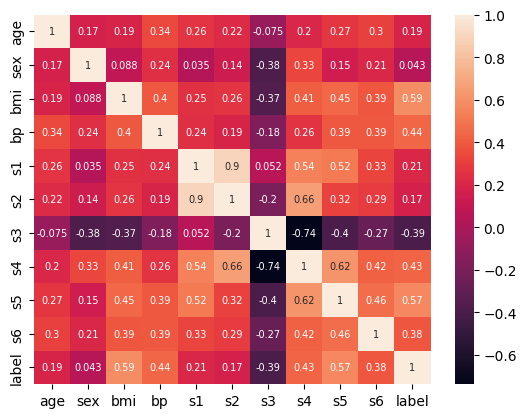

In [17]:
sns.heatmap(diabetes.corr(),annot=True,annot_kws={'size':7})

In [18]:
diabetes = diabetes.drop("sex", axis=1)


In [19]:
for col in diabetes.columns:
    if diabetes[col].dtype!=float:
        diabetes[col]=diabetes[col].astype('float')

In [20]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   bmi     442 non-null    float64
 2   bp      442 non-null    float64
 3   s1      442 non-null    float64
 4   s2      442 non-null    float64
 5   s3      442 non-null    float64
 6   s4      442 non-null    float64
 7   s5      442 non-null    float64
 8   s6      442 non-null    float64
 9   label   442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
label=diabetes['label']

In [23]:
depend=diabetes.drop("label",axis=1)

In [24]:
label_train,label_test,depend_train,depend_test=train_test_split(label,depend,test_size=0.2,random_state=0)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr=LinearRegression()
lr

LinearRegression()

In [27]:
lr.fit(depend_train,label_train)

LinearRegression()

In [28]:
depend_pred_train=lr.predict(depend_train)

In [29]:
depend_pred_test=lr.predict(depend_test)

In [30]:
from sklearn.metrics import mean_absolute_error

In [31]:
depend_pred_train.shape

(353,)

In [32]:
mea=mean_absolute_error(label_test,depend_pred_test)

In [33]:
mea

46.348900180337104